# Assignment 2

### Group 11  
Michael Hüppe, Leon Korkmaz

## Task 2: Edge detection
Noise  negatively  a  effects  edge  detection.   To  examine  the  effect  of  this  in  practice,  we  apply  edge detection on a noisy image and a smoothed image.


In [1]:
# imports
import matplotlib.pyplot as plt
from skimage import io, util, filters
import numpy as np

Load the image woman.png provided.  Note that it is already grayscale.

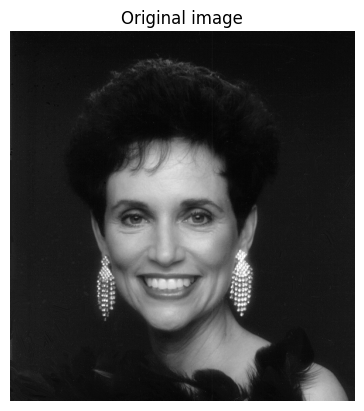

In [2]:
# Load the image
image_path = "woman.png"  # Replace with the path to the woman.png file
image = io.imread(image_path)
plt.imshow(image, cmap="grey")
plt.title("Original image")
plt.axis("off")
plt.show()

Using skimage.util.random noise, add Gaussian distributed noise to the image with a variance of 0.01.  This gives you a noisy imageN.

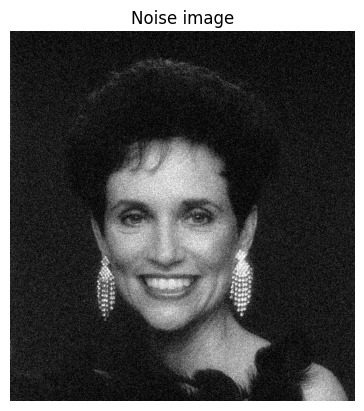

In [3]:
# Add Gaussian noise
noisy_image = util.random_noise(image, mode='gaussian', var=0.01)
plt.imshow(noisy_image, cmap="grey")
plt.title("Noise image")
plt.axis("off")
plt.show()

Apply skimage.filters.gaussian to filter N. Use σ= 1.0.  This gives you a smoothed image S.

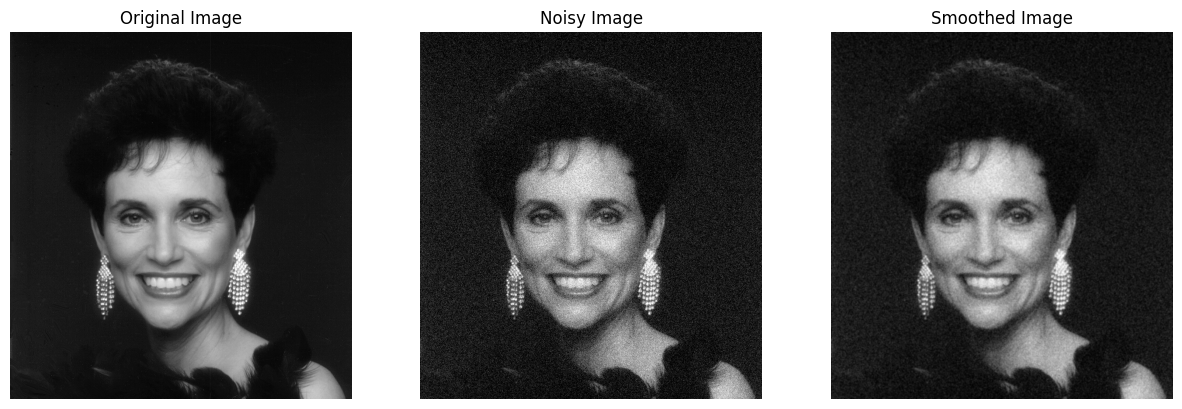

In [4]:
# Apply Gaussian filter to smooth the noisy image
smoothed_image = filters.gaussian(noisy_image, sigma=1.0)

# Plot the original, noisy, and smoothed images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(noisy_image, cmap="gray")
axs[1].set_title("Noisy Image")
axs[2].imshow(smoothed_image, cmap="gray")
axs[2].set_title("Smoothed Image")
for ax in axs:
    ax.axis("off")
plt.show()


Next, apply the Sobel filter as follows:
se the function skimage.filters.sobel.  This function applies the two Sobel kernels (horizontal and vertical) on the image, and then computes the root of the squared sum of the results.

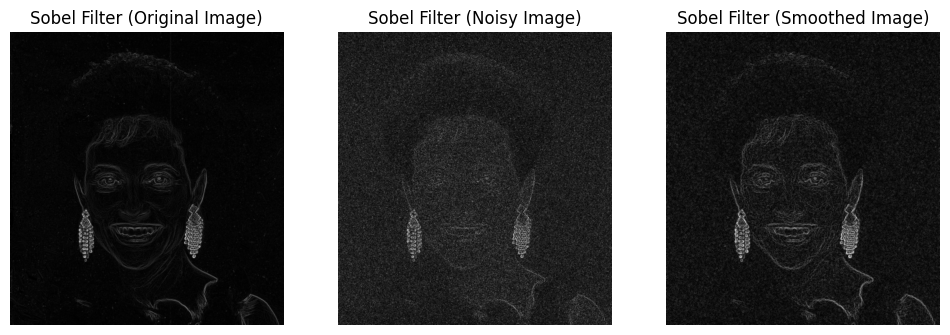

In [5]:
# Apply Sobel filter
sobel_noisy = filters.sobel(noisy_image)
sobel_smoothed = filters.sobel(smoothed_image)
sobel_original = filters.sobel(image)

# Visualize Sobel filter results
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(sobel_original, cmap="gray")
axs[0].set_title("Sobel Filter (Original Image)")
axs[1].imshow(sobel_noisy, cmap="gray")
axs[1].set_title("Sobel Filter (Noisy Image)")
axs[2].imshow(sobel_smoothed, cmap="gray")
axs[2].set_title("Sobel Filter (Smoothed Image)")
for ax in axs:
    ax.axis("off")
plt.show()

Suppose the output of the sobel function on the noisy image is $F_{n}$ and the output on the smoothed image is $F_{s}$
Draw histograms of intensity values in $F_{s}$ and $F_{n}$ and use them to select two threshold values $t_{n}$ and $t_{s}$ for edge detection.

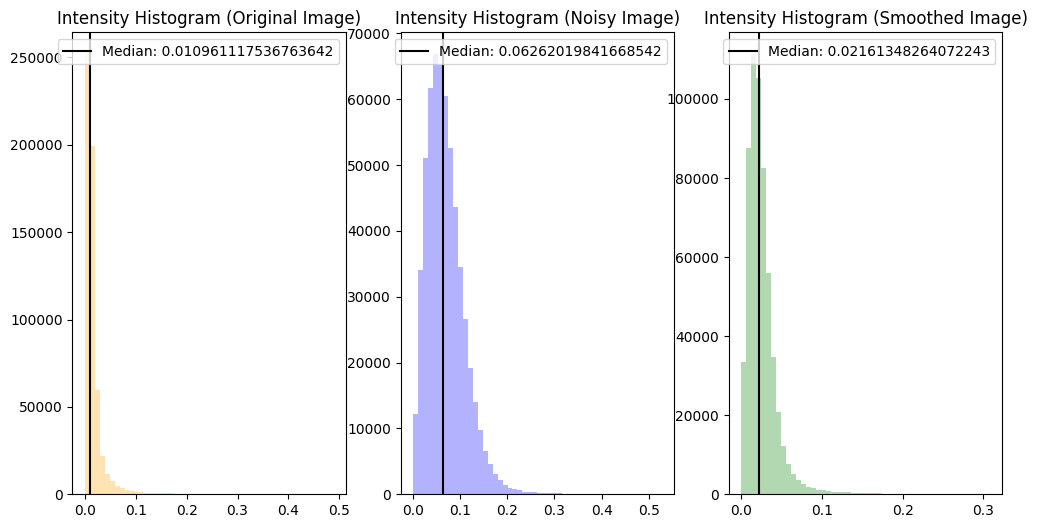

In [6]:
# Draw histograms of intensity values
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
median_original = np.median(sobel_original.ravel())
axs[0].hist(sobel_original.ravel(), bins=50, color='orange', alpha=0.3)
axs[0].set_title("Intensity Histogram (Original Image)")
axs[0].axvline(median_original, color="black", label=f"Median: {median_original}")

median_noisy = np.median(sobel_noisy.ravel())
axs[1].hist(sobel_noisy.ravel(), bins=50, color='blue', alpha=0.3)
axs[1].set_title("Intensity Histogram (Noisy Image)")
axs[1].axvline(median_noisy, color="black", label=f"Median: {median_noisy}")

median_smoothed = np.median(sobel_smoothed.ravel())
axs[2].hist(sobel_smoothed.ravel(), bins=50, color='green', alpha=0.3)
axs[2].axvline(median_smoothed, color="black", label=f"Median: {median_smoothed}")
axs[2].set_title("Intensity Histogram (Smoothed Image)")

axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

Create a binary mask by applying the logical operations $F_n \& t_n$ and $F_s \& t_s$ in NumPy. The parts of the image where the threshold is exceeded (there is an edge) are indicated by true values. Visualize the binary masks.

Tune your threshold values until the detected edges show the outline of the woman's face.
Did you notice it is almost impossible to tune the threshold for the noisy image to show just the outline of the face? Why is edge detection improved by applying smoothing?

A: Noise introduces random intensity variations, causing false edges in the Sobel filter output. Smoothing reduces high-frequency noise, making it easier for edge detection algorithms to focus on meaningful gradients rather than noise artifacts.

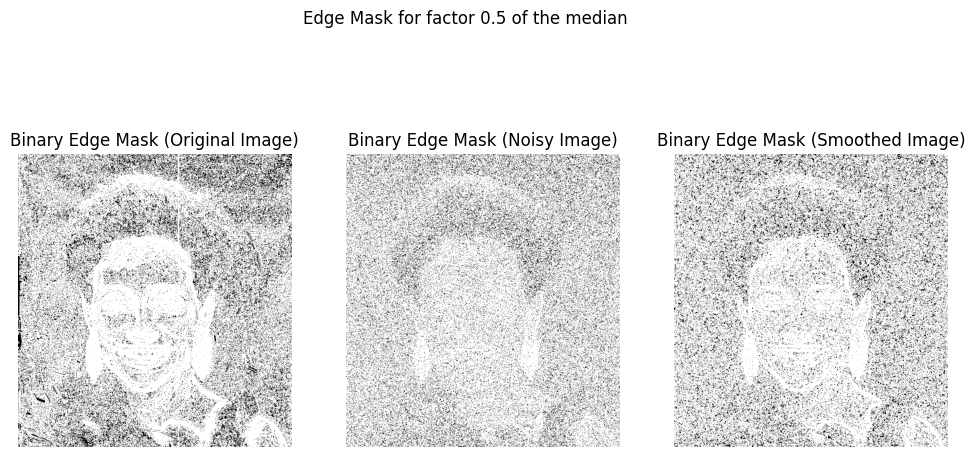

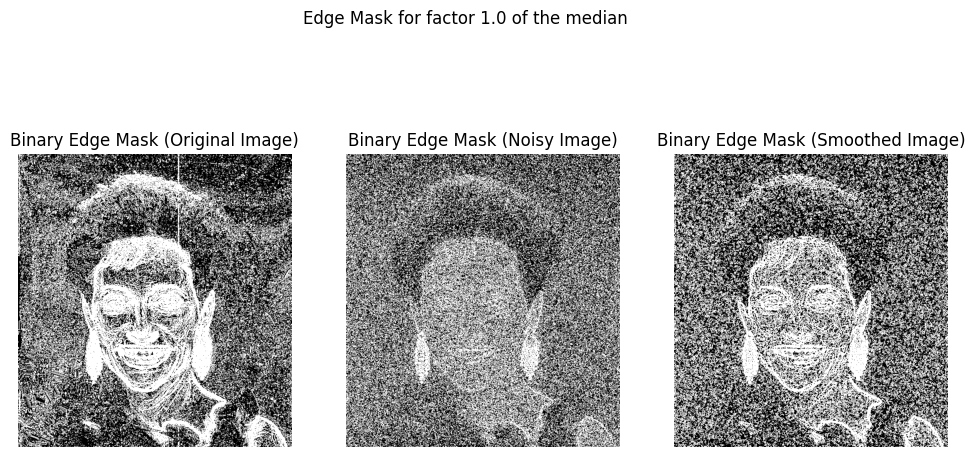

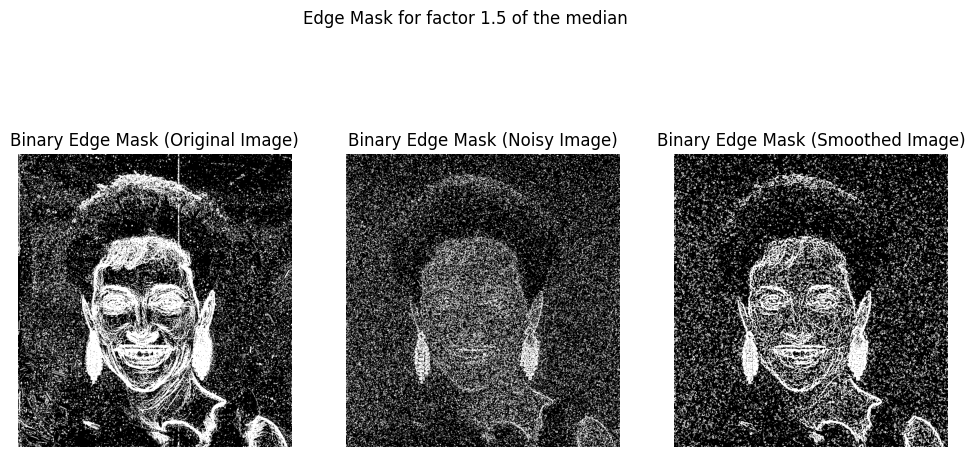

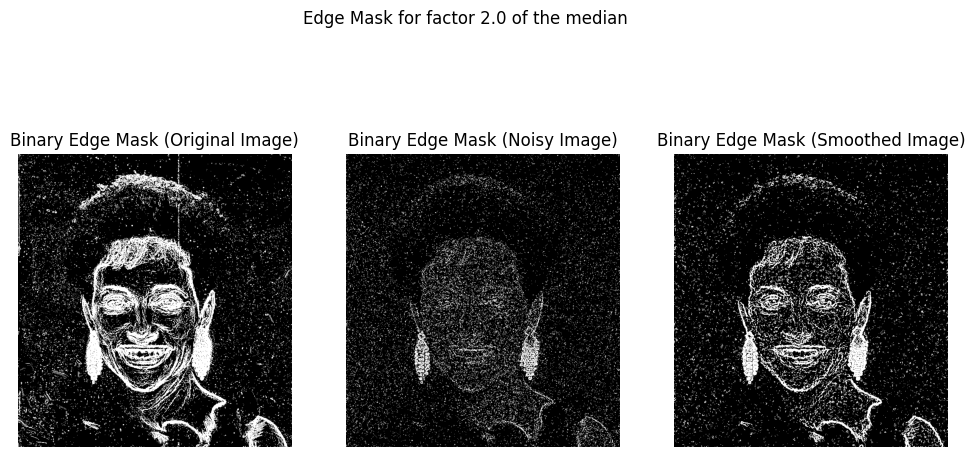

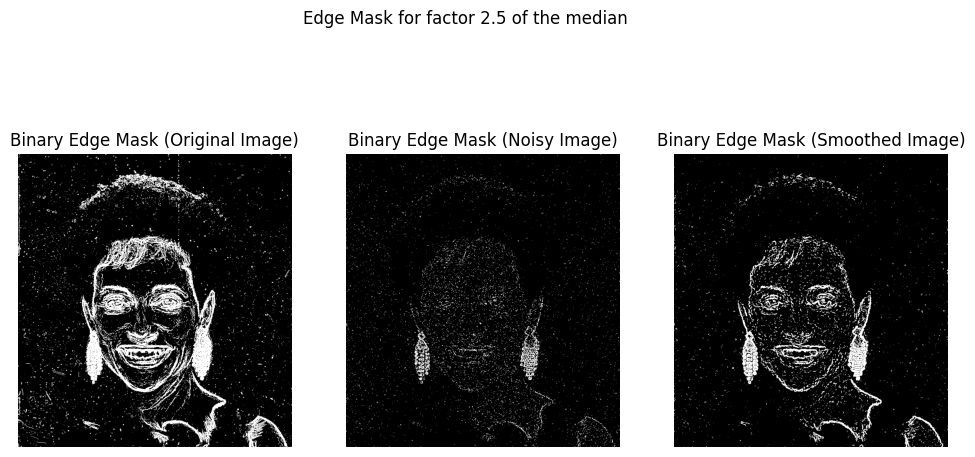

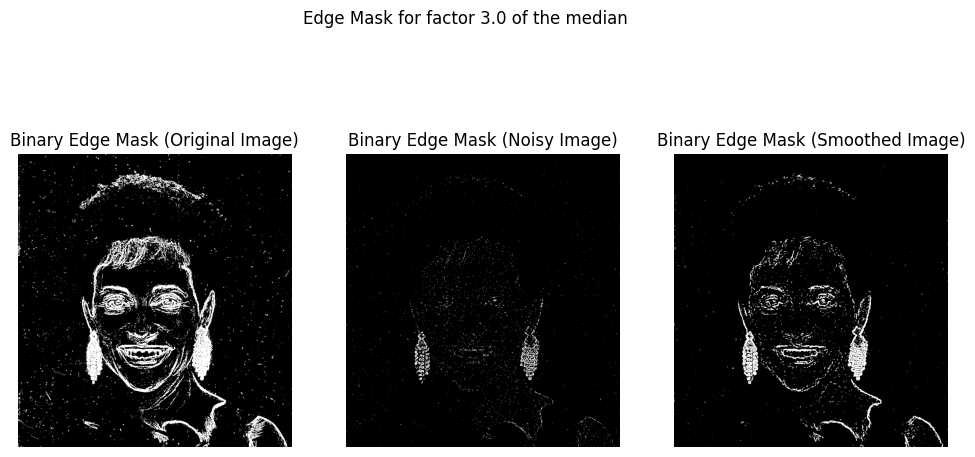

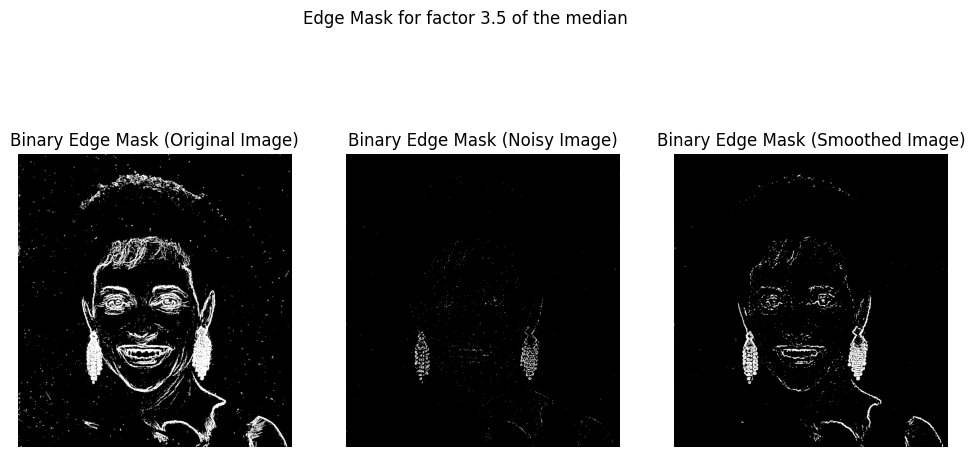

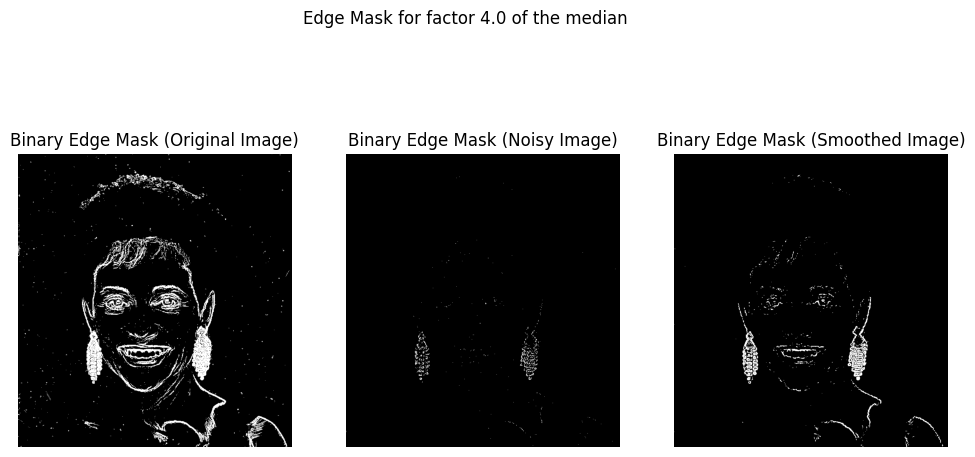

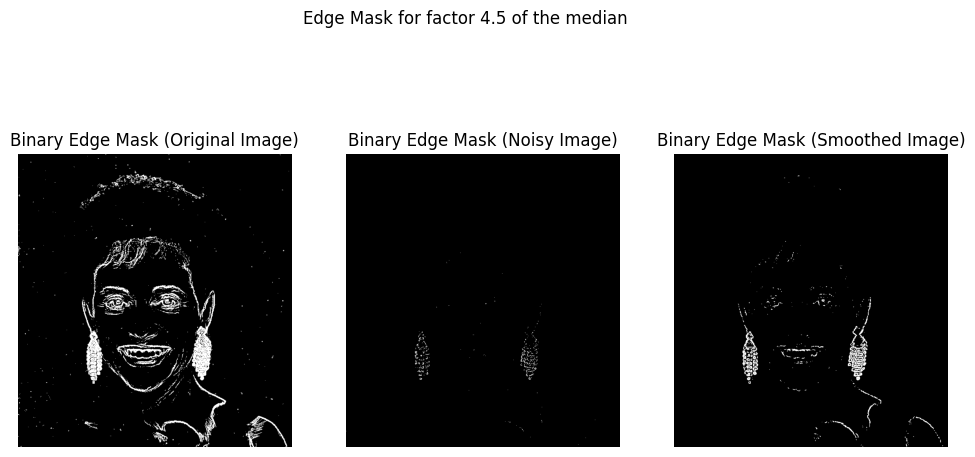

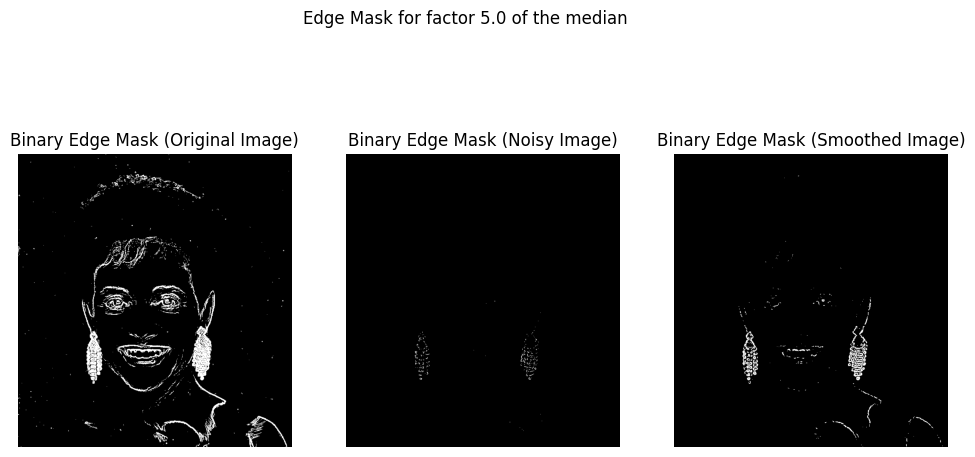

In [7]:
for factor in np.linspace(0.5, 5, 10):
    to = median_original * factor # Threshold for noisy image
    tn = median_noisy * factor # Threshold for noisy image
    ts = median_smoothed * factor # Threshold for smoothed image

    # Create binary masks
    binary_original = sobel_original > to
    binary_noisy = sobel_noisy > tn
    binary_smoothed = sobel_smoothed > ts

    # Visualize binary masks
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    fig.suptitle(f"Edge Mask for factor {factor} of the median ")
    axs[0].imshow(binary_original, cmap="gray")
    axs[0].set_title("Binary Edge Mask (Original Image)")
    axs[1].imshow(binary_noisy, cmap="gray")
    axs[1].set_title("Binary Edge Mask (Noisy Image)")
    axs[2].imshow(binary_smoothed, cmap="gray")
    axs[2].set_title("Binary Edge Mask (Smoothed Image)")
    for ax in axs:
        ax.axis("off")
    plt.show()
